## CSP 304: Machine Learning Lab (Spring 2023)
# Homework 2

Name: Samarth Bhatt <br>
College ID: 2020KUCP1068 <br>
Lab Batch: A3
<br>
<br>
<br>
<br>

### **Dataset Preprocessing**

In [1]:
# Importing Modules
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt

In [2]:
# Reading The Dataset
train_data = pd.read_csv('optdigits_train.txt', header=None, delimiter=',').iloc[:, :-1]
test_data = pd.read_csv('optdigits_test.txt', header=None, delimiter=',').iloc[:, :-1]
train_label = pd.read_csv('optdigits_train.txt', header=None, delimiter=',').iloc[:, -1]
test_label = pd.read_csv('optdigits_test.txt', header=None, delimiter=',').iloc[:, -1]

### **Q1: KNN Classification Without PCA**
Use the implementation (developed in Homework
1) for k-Nearest Neighbor (KNN) to classify the Optdigits dataset with k = {1, 3, 5, 7}. Print out
the error rate on the test set for each value of k.

In [3]:
# computing the distance between test and train data point.
def euclidean_distance(p1, p2):
  distance = np.sqrt(np.sum((p1-p2)**2))
  return distance

# KNN classifier.
class KNN:

  # constructor to initialize the K value.
  def __init__(self, k):
    self.k = k

  # method to fit the train data and train label into KNN classifier.
  def fit(self, x_train, y_train):
    self.X = x_train
    self.Y = y_train

  # method to predict the label of test data.
  def predict(self, x_test):
    prediction = [self._predict(test_point) for test_point in x_test]
    return prediction

  # helper function for predict method.
  def _predict(self, test_point):
    distances = [euclidean_distance(test_point, train_point) for train_point in self.X]
    k_nearest_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.Y[i] for i in k_nearest_indices]
    predicted_label = mode(k_nearest_labels)
    return predicted_label

preparing data for classifier

In [4]:
x_train = train_data.values
x_test = test_data.values
y_train = train_label.values
y_test = test_label.values

training and testing model for all specified K values

In [5]:
K = [1, 3, 5, 7]
predictions = []
for k in K:
  clf = KNN(k)
  clf.fit(x_train, y_train)
  prediction = clf.predict(x_test)
  predictions.append(prediction)

calculating the error in prediction for all values of K

In [6]:
errors = []
for pred in predictions:
  countFalse = 0
  pred_count = len(pred)
  for i in range(pred_count):
    if pred[i] != y_test[i]:
      countFalse += 1
  error = countFalse / pred_count
  errors.append(error)

K value and corresponding error rate of classification

In [7]:
for i in range(len(K)):
  print(f"For K = {K[i]} the error rate = {errors[i]}")

# saving the result in table
KNN_data = {'K-Values': K, 'Error Rate': errors}
df = pd.DataFrame(KNN_data)
df.to_csv('KNN_Result.csv')


For K = 1 the error rate = 0.05387205387205387
For K = 3 the error rate = 0.04713804713804714
For K = 5 the error rate = 0.04713804713804714
For K = 7 the error rate = 0.05387205387205387


### **Q2: PCA implementation**

In [8]:
def myPCA(data, num_principal_components = None):
    data_centered = data - np.mean(data, axis=0)
    cov_matrix = np.cov(data_centered.T)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    if num_principal_components is None:
        return sorted_eigenvectors, sorted_eigenvalues
    else:
        principal_components = sorted_eigenvectors[:, :num_principal_components]
        principal_values = sorted_eigenvalues[:num_principal_components]
        return principal_components, principal_values

### **Q3: KNN classifier with PCA**

Calculating all principle components and eigenvalues from the training data using the PCA implementation above.

In [9]:
pc, ev = myPCA(train_data, None)

Calculating the Variance Proportion from the Eigenvalues using below equation for k number of components.

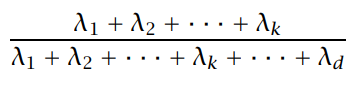


In [10]:
vp = []
sum = 0
for i in range(len(ev)):
  sum += ev[i]
  res = sum / np.sum(ev)
  vp.append(res)

Principle components vs Proportion of variance graph

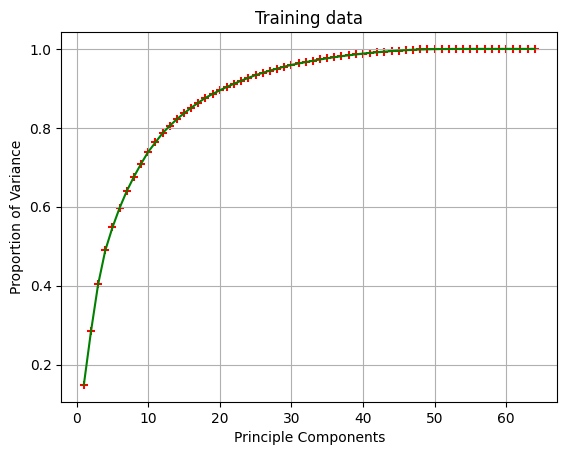

In [11]:
plt.plot(range(1, pc.shape[1]+1), vp, c='g')
plt.scatter(range(1, pc.shape[1]+1), vp, c='r', marker='+')
plt.xlabel('Principle Components')
plt.ylabel('Proportion of Variance')
plt.title("Training data")
plt.grid(True)
plt.show()

Calculating the K that covers the 90% variance in the data.

In [12]:
variance_prop = ev / np.sum(ev)
cvp = np.cumsum(variance_prop)
k = np.argmax(cvp >= 0.9) + 1
print(f"The number of components k = {k} with the coverage of {cvp[k]*100} %")

The number of components k = 21 with the coverage of 91.18793233389803 %


Calculating the first 21 principle components from the training data and projecting it on the training and testing data. 

In [13]:
pc_train = pc[:, :21]

In [14]:
train_proj = np.dot(train_data, pc_train)
test_proj = np.dot(test_data, pc_train)

Training and testing KNN on this projection dataset and computing the error rate.

In [15]:
K = [1, 3, 5, 7]
predictions = []
for k in K:
  clf = KNN(k)
  clf.fit(train_proj, y_train)
  prediction = clf.predict(test_proj)
  predictions.append(prediction)

In [16]:
errors = []
for pred in predictions:
  countFalse = 0
  pred_count = len(pred)
  for i in range(pred_count):
    if pred[i] != y_test[i]:
      countFalse += 1
  error = countFalse / pred_count
  errors.append(error)

Tabling error rate for every K value.

In [17]:
for i in range(len(K)):
  print(f"For K = {K[i]} the error rate = {errors[i]}")

# saving the result in table
KNN_data = {'K-Values': K, 'Error Rate': errors}
df = pd.DataFrame(KNN_data)
df.to_csv('KNN_PCA_Result.csv')

For K = 1 the error rate = 0.04713804713804714
For K = 3 the error rate = 0.04713804713804714
For K = 5 the error rate = 0.05387205387205387
For K = 7 the error rate = 0.05723905723905724


### **Q4: Component Plotting**
Project both the training and test data to R2 using
only the first two principal components to plot all samples in the projected space and label some
data points with the corresponding digit in 10 different colors for the 10 types of digits for a good
visualization (similar to Figure 6.5 of Textbook).

Taking the first and second PC and projecting it to Training and Testing dataset to visualize.

In [18]:
pcs = pc[:, :2]
train_proj = np.dot(x_train, pcs)
test_proj = np.dot(x_test, pcs)

Computing the training projection points corresponding to the first occurance of their 10 unique labels

In [19]:
label_index = {label: np.where(y_train == label)[0][0] for label in np.unique(y_train)}
data_points = [train_proj[index] for index in label_index.values()]

Plotting training projection points and 10 unique labels on the graph

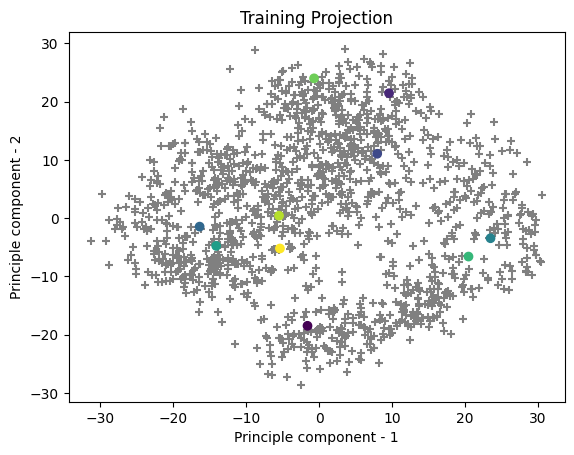

In [20]:
x_values = [x[0] for x in train_proj]
y_values = [x[1] for x in train_proj]
x_point = [i[0] for i in data_points]
y_point = [i[1] for i in data_points]
colors = np.linspace(0, 1, 10)
plt.scatter(x_values, y_values, marker='+', c='grey')
plt.scatter(x_point, y_point, c=colors)
plt.xlabel('Principle component - 1')
plt.ylabel('Principle component - 2')
plt.title('Training Projection')
plt.show()

Computing the testing projection points corresponding to the first occurance of their 10 unique labels

In [21]:
label_index = {label: np.where(y_test == label)[0][0] for label in np.unique(y_test)}
data_points = [train_proj[index] for index in label_index.values()]

Plotting training projection points and 10 unique labels on the graph

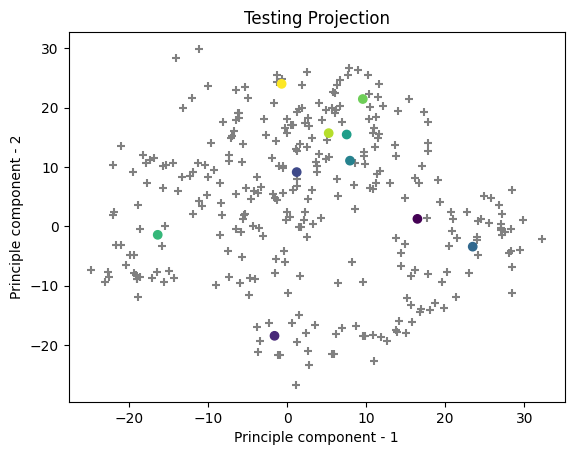

In [22]:
x_values = [x[0] for x in test_proj]
y_values = [x[1] for x in test_proj]
x_point = [i[0] for i in data_points]
y_point = [i[1] for i in data_points]
colors = np.linspace(0, 1, 10)
plt.scatter(x_values, y_values, marker='+', c='grey')
plt.scatter(x_point, y_point, c=colors)
plt.xlabel('Principle component - 1')
plt.ylabel('Principle component - 2')
plt.title('Testing Projection')
plt.show()